In [1]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_file_loader import EventFileLoader
from tensorboard.plugins.scalar import metadata
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd

def read_tensorboard_log(log_dir):
    event_file = tf.compat.v1.train.summary_iterator(log_dir)
    data = {}
    for event in event_file:
        if event.HasField('summary'):
            for value in event.summary.value:
                if value.tag not in data:
                    data[value.tag] = [[],[]]
                # print(value)
                data[value.tag][0].append(event.step)
                data[value.tag][1].append(tf.make_ndarray(value.tensor))

    return data



2023-07-12 07:02:45.372539: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-12 07:02:45.396792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 07:02:45.745467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


KeyError: 'Validation_Utility'

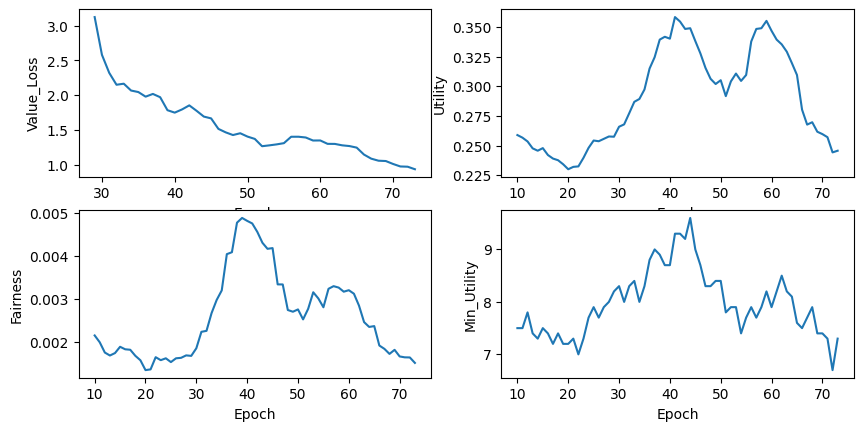

In [20]:
logdir = 'matthew/logs/DQN/Fixed/0/1689168247/events.out.tfevents.1689168247.yoda.93480.0.v2' #Simple Fixed DQN
logdir ='matthew/logs/DQN/FixedCentralComplex/0/1689168163/events.out.tfevents.1689168163.yoda.76404.0.v2' #Complex Central Fixed DQN
logdir = 'matthew/logs/DQN/FixedCentral/0/1689168205/events.out.tfevents.1689168205.yoda.87326.0.v2' #Fixed Central DQN
logdir = 'matthew/logs/DQN/FixedComplex/0/1689168126/events.out.tfevents.1689168126.yoda.66238.0.v2' #Complex Fixed DQN

#TODO: lower prob of null action when random
#TODO: Idea, add 4 actions, which are just moving towards one of the 4 corners. Will act as exploration. 
# Especially when combined with resource spawning densities
#TODO Try reducing the size update after eating food
#TODO: Try minimizing using shared reward for variance
#TODO: Try using joint reward for efficiency


data = read_tensorboard_log(logdir)

keys = [ 'Value_Loss', 'Utility', 'Fairness', 'Min_Utility', "Validation_Utility", "Validation_Fairness", "Validation_Min_Utility" ]
# keys = ['Utility', 'Fairness']

#Plot subfigures
fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(keys):
    x = data[key][0]
    y = data[key][1]
    # print(key, x, y)
    #plot a smoothed curve
    y_smooth = pd.DataFrame(y).rolling(10).mean()
    # y_smooth = y
    df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
    plt.subplot(4, 2, i+1)
    plt.xlabel('Epoch')
    plt.ylabel(key)
    plt.plot(x, y_smooth)
# plt.show()

# #plot 2x2 subfigures using plotly
for i, key in enumerate(keys):
    x = data[key][0]
    y = data[key][1]
    # print(key, x, y)
    print(key)
    #plot a smoothed curve
    y_smooth = pd.DataFrame(y).rolling(1).mean()
    # y_smooth = y
    #change the size of the figure
    px.defaults.width = 800
    df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
    fig = px.line(df, x='Epoch', y=key, title=key)
    fig.show()


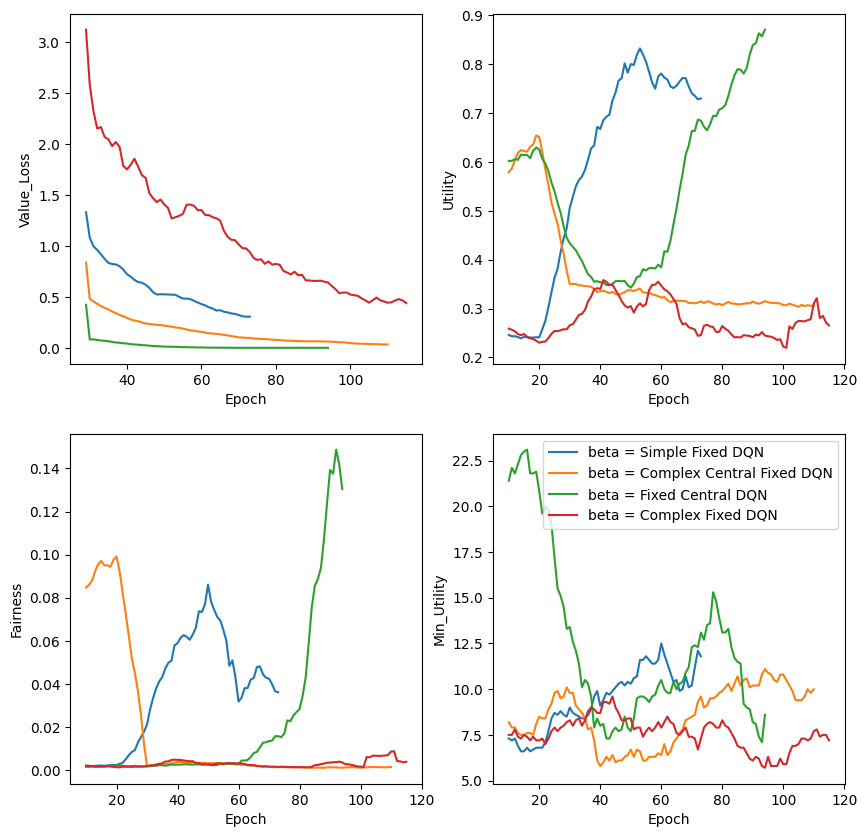

In [23]:
#Comparing 4 runs

#DQN with learning beta 
betas = [100, 10, 1, 0]
logdir1 = 'matthew/logs/DQN/Fixed/0/1689168247/events.out.tfevents.1689168247.yoda.93480.0.v2' #Simple Fixed DQN
logdir2 ='matthew/logs/DQN/FixedCentralComplex/0/1689168163/events.out.tfevents.1689168163.yoda.76404.0.v2' #Complex Central Fixed DQN
logdir3 = 'matthew/logs/DQN/FixedCentral/0/1689168205/events.out.tfevents.1689168205.yoda.87326.0.v2' #Fixed Central DQN
logdir4 = 'matthew/logs/DQN/FixedComplex/0/1689168126/events.out.tfevents.1689168126.yoda.66238.0.v2' #Complex Fixed DQN

betas = ['Simple Fixed DQN', 'Complex Central Fixed DQN', 'Fixed Central DQN', 'Complex Fixed DQN']
logdirs = [logdir1, logdir2, logdir3, logdir4]

data = [read_tensorboard_log(logdir) for logdir in logdirs]

keys = ['Policy_Loss', 'Value_Loss', 'Utility', 'Fairness']
keys = [ 'Value_Loss', 'Utility', 'Fairness', 'Min_Utility']
# keys = ['Utility', 'Fairness']

#Plot subfigures
fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(keys):
    for j, logdir in enumerate(logdirs):
        x = data[j][key][0]
        y = data[j][key][1]

        #plot a smoothed curve
        y_smooth = pd.DataFrame(y).rolling(10).mean()
        # y_smooth = y
        df = pd.DataFrame({'Epoch': x, key: y_smooth[0]})
        plt.subplot(2, 2, i+1)
        plt.xlabel('Epoch')
        plt.ylabel(key)
        plt.plot(x, y_smooth, label = 'beta = ' + str(betas[j]))
plt.legend()
plt.show()



In [4]:

# #plot 2x2 subfigures using plotly
for i, key in enumerate(keys):
    x = []
    y = []
    beta = []
    for j in range(len(data)):
        x.extend(data[j][key][0])
        y_smooth = pd.DataFrame(data[j][key][1]).rolling(50).mean()[0]
        y.extend(y_smooth)
        beta.extend([betas[j] for _ in range(len(data[j][key][0]))])

    print(key)
    #plot a smoothed curve
    
    # y_smooth = y
    #change the size of the figure
    px.defaults.width = 800
    # print(len(x), len(y), len(beta))
    df = pd.DataFrame({'Epoch': x, key: y,'beta': beta})
    fig = px.line(df, x='Epoch', y=key, title=key, color='beta')
    fig.show()

Value_Loss


Utility


Fairness


Min_Utility


In [31]:
import os
os.listdir('logs/OnPolicyVF/Reallocate/')

['1688243213',
 '1688243480',
 '1688243502',
 '1688243545',
 '1688243448',
 '1688242381']

In [16]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
# %reload_ext tensorboard
# %tensorboard --logdir runs --host localhost --port 8888
# !kill 2976453

# tensorboard dev upload --logdir logs/OnPolicyVF     --name "Experiments for FEN code, MARL"     --description "Training for efficiency"

You can detach from your tmux session by pressing Ctrl+B then D. Tmux operates using a series of keybindings (keyboard shortcuts) triggered by pressing the "prefix" combination. By default, the prefix is Ctrl+B. After that, press D to detach from the current session.

You're no longer attached to the session, but your long-running command executes safely in the background. You can list active tmux sessions with tmux ls:

You can disconnect your SSH connection at this point, and the command will continue to run. When you're ready, reconnect to the server and reattach to the existing tmux session to resume where you left off:

$ tmux attach -t 0
Hello 72
Hello 73
Hello 74
Hello 75
Hello 76
^C

As you can see, the command continued to run and print messages on the screen. You can type Ctrl+C to cancel it.

All tmux commands can also be abbreviated, so, for example, you can enter tmux a , and it will work the same as tmux attach.

This functionality alone makes tmux a great tool, but it has even more to offer, including its default keybindings.